In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv(r"C:\Users\h.rahnavard\Downloads\1632300362534233.csv")
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


array([[<Axes: title={'center': 'Room'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Price(USD)'}>, <Axes: >]], dtype=object)

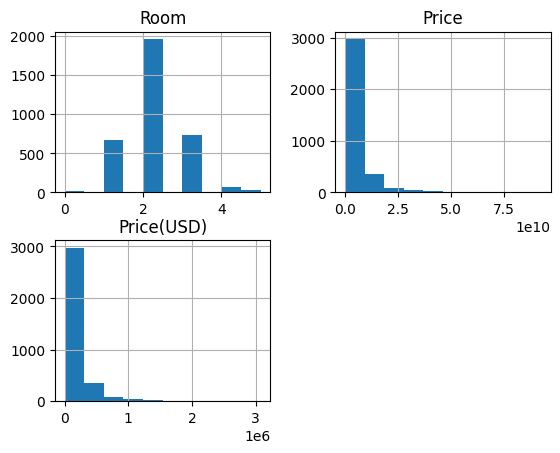

In [3]:
df.hist()

# assinging numerical values to the state of parkings, warehouses and elevators

In [4]:
le = LabelEncoder()
df["Parking"] = le.fit_transform(df["Parking"])
df["Warehouse"] = le.fit_transform(df["Warehouse"])
df["Elevator"] = le.fit_transform(df["Elevator"])
df.describe()

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# Deleting rows with no addresses

In [5]:
bad_indexes = []
for i in range(len(df)):
    address = df.loc[i, "Address"]
    if address == "" or address is None or address is np.nan or str(address).strip() == 'nan':
        bad_indexes.append(i)
df = df.drop(bad_indexes).reset_index(drop=True)
df.describe()

,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3456.000000,3456.000000,3456.000000,3456.000000,3.456000e+03,3.456000e+03
mean,2.081308,0.847512,0.914931,0.787326,5.379957e+09,1.793319e+05
std,0.759723,0.359546,0.279025,0.409258,8.121729e+09,2.707243e+05
min,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.000000,1.000000,1.000000,1.420000e+09,4.733333e+04
50%,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# there can be no houses with an area that's greater than 100000 but we also have to find out the maximum area for houses with valid area entries, which, after taking a cursory look, did not go higher than 750. Cheking here: 

In [6]:
for i in range(len(df)):
    rawvalue = df.loc[i,"Area"]
    converted = str(rawvalue).replace("," , "").strip()
    df.loc[i,"Area"] = int(converted)
df["Area"] = pd.to_numeric(df["Area"])
df["Area"].describe()
print(df["Area"].max())
print(df["Area"].min())
print(df["Area"].mean())
print(df["Area"].dtype)
(df["Area"] > 800) & (df["Area"] < 100000).any()

16160000000
30
8802191.396122685
int64


0       False
1       False
2       False
3       False
4       False
        ...  
3451    False
3452    False
3453    False
3454    False
3455    False
Name: Area, Length: 3456, dtype: bool

# Deleting rows with invalid area entries:

In [7]:
wrong_areas = []
for i in range(len(df)):
    if df.loc[i,"Area"] > 800:
        wrong_areas.append(i)
df = df.drop(wrong_areas).reset_index(drop=True)
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3.447000e+03,3.447000e+03
mean,106.229475,2.080070,0.847404,0.914999,0.787932,5.352295e+09,1.784098e+05
std,65.548021,0.758756,0.359650,0.278924,0.408832,8.029127e+09,2.676376e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,750.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# In an attempt to assign numerical values to addresses, first we ignore repetitions 

In [8]:
unique_addresses = df["Address"].drop_duplicates()
print(list(unique_addresses))

['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb', 'North Program Organization', 'Andisheh', 'West Ferdows Boulevard', 'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi', 'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh', 'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden', 'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad', 'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht', 'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad', 'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan', 'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No', 'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh', 'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr', 'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi', 'Keshavarz Boulevard', 'Kahrizak', 'Qarchak', 'Northren Jamalzadeh', 'Azarbaijan', 'Bahar', 'Persian Gulf Martyrs Lake', 'Beryanak', 'Heshmatieh', 'Elm-o-Sanat', 'Golestan', 'Shahr-e-Ziba', 'Pasdaran', 'Ch

# Trying to calculate each places's coordinate to be able to calculate the distance between them and uptown, assinging the distance as numerical values later on.
از اونجایی که ران کردن دوباره‌ی این بلوک کد به تایم‌اوت ارور خورد، از دیتاهای به دست اومده توی ران قبلی همین بلوک به عنوان دیتاست موقعیت استفاده کردم

import time
from geopy.geocoders import Nominatim
geolocater = Nominatim(user_agent = 'me')
def get_coords(place):
    location = geolocater.geocode(f"{place}, Tehran, Iran")
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

coordinates = []
for i in unique_addresses:
    place = i
    coord = get_coords(place)
    coordinates.append(coord)
    time.sleep(1)
print(coordinates)


In [9]:
f = open(r"C:\Users\h.rahnavard\Documents\coordinates.csv.txt")
coordinates = []
for line in f:
    coordinates.append(line.strip())
f.close()
print(coordinates)


['Shahran, (35.753978, 51.2874715)', 'Pardis, (35.7411286, 51.815509)', 'Shahrake Qods, None', 'Shahrake Gharb, None', 'North Program Organization, None', 'Andisheh, (35.7052413, 51.0296232)', 'West Ferdows Boulevard, None', 'Narmak, (35.7363694, 51.5041892)', 'Saadat Abad, (35.7860955, 51.3781445)', 'Zafar, (35.7668336, 51.4194241)', 'Islamshahr, (35.5478513, 51.2318676)', 'Pirouzi, (35.6909048, 51.4571519)', 'Shahrake Shahid Bagheri, None', 'Moniriyeh, (35.6811307, 51.401641)', 'Velenjak, (35.8066647, 51.4013931)', 'Amirieh, (35.6289081, 51.027627)', 'Southern Janatabad, None', 'Salsabil, (35.6961197, 51.37395)', 'Zargandeh, (35.7732674, 51.4329527)', 'Feiz Garden, None', 'Water Organization, (35.7164354, 51.396155)', 'ShahrAra, (35.717269, 51.3739168)', 'Gisha, (35.7369191, 51.3770576)', 'Ray, (35.5989911, 51.4357865)', 'Abbasabad, (35.5866299, 51.3384738)', 'Ostad Moein, (35.7001565, 51.3447089)', 'Farmanieh, (35.7961378, 51.4710658)', 'Parand, (35.477882, 50.9469189)', 'Punak, (35

# Checking for places that are not found through Nominatim

In [10]:
import copy
Manual_edit = []
checklist = copy.deepcopy(coordinates)
for i in checklist:
    i = i.split(",")
    if i[1].strip() == 'None':
        Manual_edit.append(i[0])
print(Manual_edit)

['Shahrake Qods', 'Shahrake Gharb', 'North Program Organization', 'West Ferdows Boulevard', 'Shahrake Shahid Bagheri', 'Southern Janatabad', 'Feiz Garden', 'Qasr-od-Dasht', 'Aqdasieh', 'Railway', 'Central Janatabad', 'East Ferdows Boulevard', 'Northern Janatabad', 'Southern Program Organization', 'Rudhen', 'West Pars', 'Dorous', 'Jeyhoon', 'Northren Jamalzadeh', 'Azarbaijan', 'Chardivari', 'Gheitarieh', 'Dehkade Olampic', 'Republic', 'Qazvin Imamzadeh Hassan', 'Southern Chitgar', 'Si Metri Ji', 'Northern Chitgar', 'East Pars', 'Sohanak', 'Azadshahr', 'Mahmoudieh', 'Tenant', 'Chardangeh', 'Shahrakeh Naft', 'Nawab', 'Northern Suhrawardi', 'Villa', 'Hakimiyeh', 'Garden of Saba', 'Shahrake Apadana', 'Shahrake Azadi', 'Shahrake Madaen', 'Islamshahr Elahieh', 'Ray - Montazeri', 'Firoozkooh Kuhsar', 'Southern Suhrawardi', 'Dolatabad', 'Kazemabad', 'Ray - Pilgosh', 'Ghiyamdasht', 'Argentina', 'Shahrake Quds', 'Khademabad Garden', 'Chidz', 'Boloorsazi', 'Mehrabad River River', 'Varamin - Behesh

# assigning imaginary coordinates to the not-found places:

In [11]:
imaginary_coords = {
    'Shahrake Qods': (35.700, 51.150),
    'Shahrake Gharb': (35.750, 51.300),
    'North Program Organization': (35.800, 51.400),
    'West Ferdows Boulevard': (35.720, 51.280),
    'Shahrake Shahid Bagheri': (35.770, 51.320),
    'Southern Janatabad': (35.680, 51.250),
    'Feiz Garden': (35.730, 51.200),
    'Qasr-od-Dasht': (35.690, 51.220),
    'Aqdasieh': (35.760, 51.340),
    'Railway': (35.710, 51.180),
    'Central Janatabad': (35.690, 51.240),
    'East Ferdows Boulevard': (35.730, 51.290),
    'Northern Janatabad': (35.700, 51.270),
    'Southern Program Organization': (35.670, 51.230),
    'Rudhen': (35.790, 51.380),
    'West Pars': (35.740, 51.310),
    'Dorous': (35.720, 51.210),
    'Jeyhoon': (35.710, 51.260),
    'Northren Jamalzadeh': (35.780, 51.370),
    'Azarbaijan': (35.690, 51.330),
    'Chardivari': (35.705, 51.225),
    'Gheitarieh': (35.760, 51.315),
    'Dehkade Olampic': (35.715, 51.240),
    'Republic': (35.725, 51.280),
    'Qazvin Imamzadeh Hassan': (35.695, 51.210),
    'Southern Chitgar': (35.680, 51.290),
    'Si Metri Ji': (35.750, 51.270),
    'Northern Chitgar': (35.770, 51.295),
    'East Pars': (35.735, 51.325),
    'Sohanak': (35.710, 51.355),
    'Azadshahr': (35.700, 51.360),
    'Mahmoudieh': (35.745, 51.330),
    'Tenant': (35.730, 51.310),
    'Chardangeh': (35.695, 51.275),
    'Shahrakeh Naft': (35.740, 51.290),
    'Nawab': (35.710, 51.300),
    'Northern Suhrawardi': (35.720, 51.320),
    'Villa': (35.700, 51.295),
    'Hakimiyeh': (35.715, 51.310),
    'Garden of Saba': (35.725, 51.335),
    'Shahrake Apadana': (35.735, 51.320),
    'Shahrake Azadi': (35.750, 51.335),
    'Shahrake Madaen': (35.720, 51.340),
    'Islamshahr Elahieh': (35.690, 51.300),
    'Ray - Montazeri': (35.700, 51.310),
    'Firoozkooh Kuhsar': (35.780, 51.290),
    'Southern Suhrawardi': (35.670, 51.280),
    'Dolatabad': (35.685, 51.265),
    'Kazemabad': (35.700, 51.285),
    'Ray - Pilgosh': (35.705, 51.295),
    'Ghiyamdasht': (35.715, 51.310),
    'Argentina': (35.720, 51.320),
    'Shahrake Quds': (35.730, 51.330),
    'Khademabad Garden': (35.740, 51.340),
    'Chidz': (35.750, 51.350),
    'Boloorsazi': (35.760, 51.360),
    'Mehrabad River River': (35.770, 51.370),
    'Varamin - Beheshti': (35.780, 51.380),
    'Thirteen November': (35.790, 51.390),
    'Aliabad South': (35.800, 51.400),
    'Vahidiyeh': (35.810, 51.410),
    'Naziabad': (35.820, 51.420),
    'Yakhchiabad': (35.830, 51.430),
}
for index, value in enumerate(coordinates):
    value = value.split(",")
    place = value[0].strip()
    coord = value[1].strip()
    if coord == 'None':
        imaginary_coord = imaginary_coords[place]
        coordinates[index] = f"{place}, {imaginary_coord}"
print(coordinates)

['Shahran, (35.753978, 51.2874715)', 'Pardis, (35.7411286, 51.815509)', 'Shahrake Qods, (35.7, 51.15)', 'Shahrake Gharb, (35.75, 51.3)', 'North Program Organization, (35.8, 51.4)', 'Andisheh, (35.7052413, 51.0296232)', 'West Ferdows Boulevard, (35.72, 51.28)', 'Narmak, (35.7363694, 51.5041892)', 'Saadat Abad, (35.7860955, 51.3781445)', 'Zafar, (35.7668336, 51.4194241)', 'Islamshahr, (35.5478513, 51.2318676)', 'Pirouzi, (35.6909048, 51.4571519)', 'Shahrake Shahid Bagheri, (35.77, 51.32)', 'Moniriyeh, (35.6811307, 51.401641)', 'Velenjak, (35.8066647, 51.4013931)', 'Amirieh, (35.6289081, 51.027627)', 'Southern Janatabad, (35.68, 51.25)', 'Salsabil, (35.6961197, 51.37395)', 'Zargandeh, (35.7732674, 51.4329527)', 'Feiz Garden, (35.73, 51.2)', 'Water Organization, (35.7164354, 51.396155)', 'ShahrAra, (35.717269, 51.3739168)', 'Gisha, (35.7369191, 51.3770576)', 'Ray, (35.5989911, 51.4357865)', 'Abbasabad, (35.5866299, 51.3384738)', 'Ostad Moein, (35.7001565, 51.3447089)', 'Farmanieh, (35.7961

# Assinging a coordinate to uptown

In [12]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent='me')

def get_coords(place):
    location = geolocator.geocode(f"{place}, Tehran, Iran")
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

uptown = get_coords("Niavaran")
print(uptown)


(35.8160561, 51.4709472)


# Calculating the distance between each coordinate and uptown:

In [13]:
dists = {}
from geopy.distance import distance
for index, value in enumerate(coordinates):
    value = value.split(",", 1)
    place = value[0].strip()
    coord_str = value[1].strip().strip('()')
    coord_str = coord_str.split(",")
    lan, lon = coord_str[0].strip(), coord_str[1].strip()
    coord = (float(lan), float(lon))
    dist = distance(uptown, coord).km
    dists[place] = int(dist)
print(dists)

{'Shahran': 17, 'Pardis': 32, 'Shahrake Qods': 31, 'Shahrake Gharb': 17, 'North Program Organization': 6, 'Andisheh': 41, 'West Ferdows Boulevard': 20, 'Narmak': 9, 'Saadat Abad': 9, 'Zafar': 7, 'Islamshahr': 36, 'Pirouzi': 13, 'Shahrake Shahid Bagheri': 14, 'Moniriyeh': 16, 'Velenjak': 6, 'Amirieh': 45, 'Southern Janatabad': 25, 'Salsabil': 15, 'Zargandeh': 5, 'Feiz Garden': 26, 'Water Organization': 12, 'ShahrAra': 14, 'Gisha': 12, 'Ray': 24, 'Abbasabad': 28, 'Ostad Moein': 17, 'Farmanieh': 2, 'Parand': 60, 'Punak': 14, 'Qasr-od-Dasht': 26, 'Aqdasieh': 13, 'Pakdasht': 42, 'Railway': 28, 'Central Janatabad': 25, 'East Ferdows Boulevard': 18, 'Pakdasht KhatunAbad': 38, 'Sattarkhan': 14, 'Baghestan': 36, 'Shahryar': 5, 'Northern Janatabad': 22, 'Daryan No': 14, 'Southern Program Organization': 27, 'Rudhen': 8, 'West Pars': 16, 'Afsarieh': 18, 'Marzdaran': 14, 'Dorous': 25, 'Sadeghieh': 15, 'Chahardangeh': 27, 'Baqershahr': 31, 'Jeyhoon': 22, 'Lavizan': 7, 'Shams Abad': 7, 'Fatemi': 13, 

# Replacing all addresses with numerical data showing their distance from uptown

In [14]:
for i in range(len(df)):
    for place in dists:
        if df.loc[i,"Address"] == place:
            df.loc[i,"Address"] = dists[place]
print(df["Address"])

0       17
1       17
2       32
3       31
4       17
        ..
3442    25
3443     0
3444    60
3445    25
3446    60
Name: Address, Length: 3447, dtype: object


# Drawing a correlation map.Judging my this heatmap, the most important factors are area, room, and address. The effect of other factors is weak to negligble

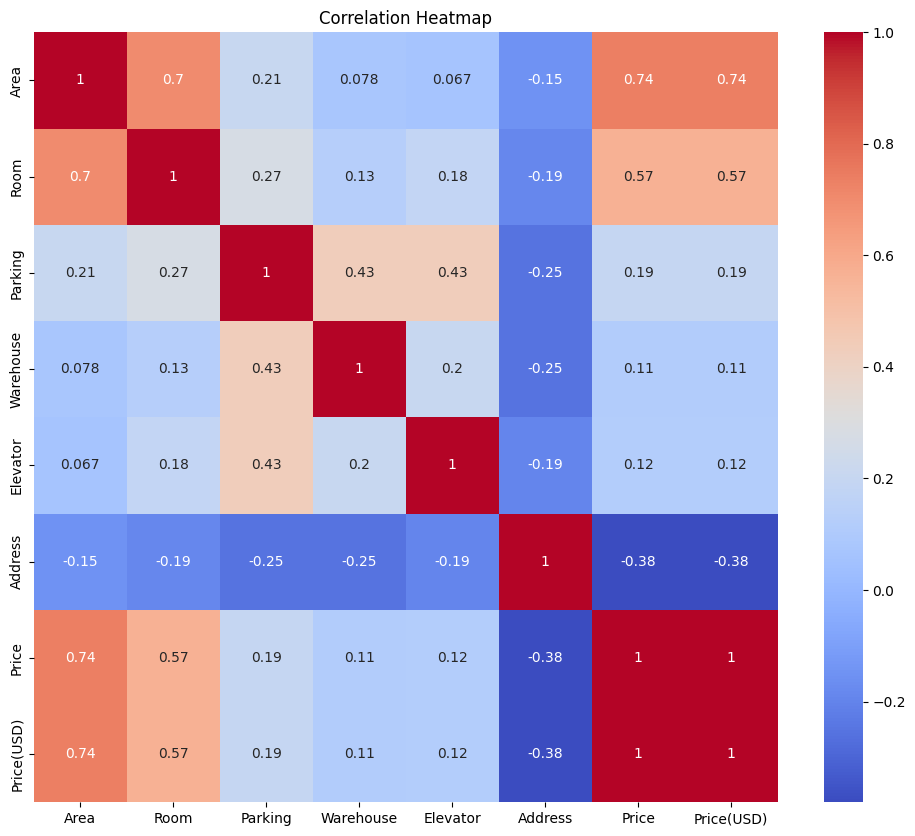

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [17]:
cdf = df[["Area", "Address", "Room", "Price"]]
cdf.describe()

,Area,Room,Price
count,3447.000000,3447.000000,3.447000e+03
mean,106.229475,2.080070,5.352295e+09
std,65.548021,0.758756,8.029127e+09
min,30.000000,0.000000,3.600000e+06
25%,69.000000,2.000000,1.418250e+09
50%,90.000000,2.000000,2.900000e+09
75%,120.000000,2.000000,6.000000e+09
max,750.000000,5.000000,9.240000e+10


# Drawing some rudimentary graphs

Text(0.5, 0, 'Area')

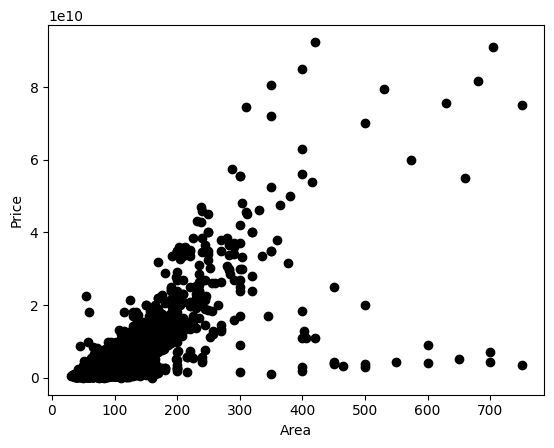

In [18]:
plt.scatter(cdf["Area"], cdf["Price"], color='black')
plt.ylabel("Price")
plt.xlabel("Area")

Text(0.5, 0, 'Room')

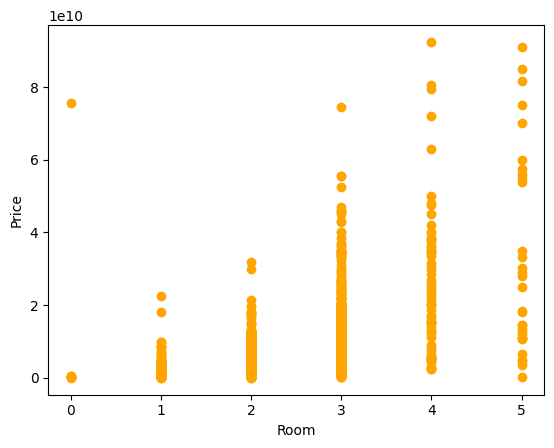

In [19]:
plt.scatter(cdf["Room"], cdf["Price"], color='orange')
plt.ylabel("Price")
plt.xlabel("Room")

Text(0.5, 0, 'Address')

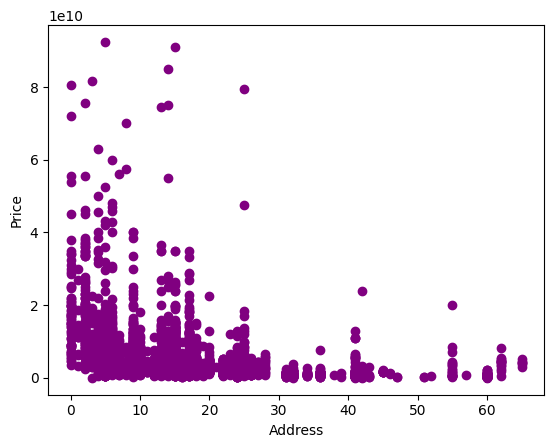

In [20]:
plt.scatter(cdf["Address"], cdf["Price"], color='purple')
plt.ylabel("Price")
plt.xlabel("Address")

# Splittint the data

In [21]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Getting into the regression model

In [22]:
x_train = np.asarray(train[["Area", "Room", "Address"]])
y_train = np.asarray(train["Price"])
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
coefficients = model.coef_
print(f"the coefficient for Area is: {coefficients[0]}")
print(f"the coefficient for Rooms is: {coefficients[1]}")
print(f"the coefficient for Address is: {coefficients[2]}")
intercept = model.intercept_
print(f"intercept is {intercept}")
features = train[["Area", "Room", "Address"]].columns
equation = f"Price = {intercept:.2f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.2f} * {feature})"

print(equation)

the coefficient for Area is: 76792538.86523885
the coefficient for Rooms is: 644033511.4714849
the coefficient for Address is: -165548941.11040246
intercept is -928219172.6649799
Price = -928219172.66 + (76792538.87 * Area) + (644033511.47 * Room) + (-165548941.11 * Address)


# We see that the coefficients are huge numbers, so it may help to normalize our data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)
y_pred = model.predict(x_train_scaled)
coefficients = model.coef_.flatten()
print(f"the coefficient for Area is: {coefficients[0]}")
print(f"the coefficient for Rooms is: {coefficients[1]}")
print(f"the coefficient for Address is: {coefficients[2]}")
intercept = model.intercept_[0]
print(f"intercept is {intercept}")
features = train[["Area", "Room", "Address"]].columns
equation = f"Price = {intercept:.2f}"
for coef, feature in zip(coefficients, features):
    equation += f" + ({coef:.2f} * {feature})"

print(equation)


the coefficient for Area is: 0.642481007040987
the coefficient for Rooms is: 0.06299614446189908
the coefficient for Address is: -0.28205198869768355
intercept is 1.2349911632591552e-18
Price = 0.00 + (0.64 * Area) + (0.06 * Room) + (-0.28 * Address)


# Running a comparison between train predictions and true values in the training data set

In [24]:
for i in range(10):
    print(f"True: {y_train_scaled.flatten()[i]}, Predicted: {y_pred[i]}")


True: -0.44346597538178045, Predicted: [-0.45767257]
True: -0.44346597538178045, Predicted: [-0.48726792]
True: -0.6104698420786538, Predicted: [-0.53610272]
True: -0.5651861013012324, Predicted: [-0.3569937]
True: -0.6040466164364664, Predicted: [-0.4571818]
True: -0.4049266215286558, Predicted: [-0.49713304]
True: -0.6177923193107475, Predicted: [-0.9741351]
True: -0.3766644287030311, Predicted: [-0.44255314]
True: -0.36638726767553115, Predicted: [-0.38941303]
True: 0.7319843171385211, Predicted: [0.59808912]


# Running the model on test data set and comparing predictions with true values:

In [25]:
x_test = np.asarray(test[["Area", "Room", "Address"]])
y_test = np.asarray(test["Price"])
x_test_scaled = scaler_x.fit_transform(x_test)
y_test_scaled = scaler_y.fit_transform(y_test.reshape(-1,1))
model.fit(x_test_scaled, y_test_scaled)
y_test_pred = model.predict(x_test_scaled)
for i in range(10):
    print(f"True: {y_test_scaled.flatten()[i]}, Predicted: {y_test_pred[i]}")

True: 0.16279491107763083, Predicted: [0.21708125]
True: -0.39248005801985264, Predicted: [-0.18236099]
True: -0.38687121994816087, Predicted: [-0.31878684]
True: -0.43286369213603326, Predicted: [-0.42836951]
True: 0.1291418826474803, Predicted: [0.72085201]
True: -0.4115501074636046, Predicted: [-0.43971651]
True: -0.4237773744598926, Predicted: [-0.74860683]
True: -0.3812623818764691, Predicted: [-0.59875716]
True: -0.20177956358233307, Predicted: [0.0251658]
True: -0.24104143008417533, Predicted: [-0.38453645]


# Calculating different evaluation metrics:

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
r2 = r2_score(y_test_scaled, y_test_pred)
mse = mean_squared_error(y_test_scaled, y_test_pred)
mae = mean_absolute_error(y_test_scaled, y_test_pred)
print(f"R2 Score: {r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")

R2 Score: 0.670323586251018
mse: 0.32967641374898204
mae: 0.285762435810768
